[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# MNIST KNN

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 10/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0033ConfMatCrossValidation.ipynb)

In [36]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Image Processing

# Machine Learning

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [37]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [38]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [39]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotConfusionMatrix, PlotLabelsHistogram, PlotMnistImages


In [40]:
# General Auxiliary Functions



In [41]:
# Parameters

# Data Generation
numImg  = 3
vSize   = [28, 28] #<! Size of images

numSamples  = 10_000
trainRatio  = 0.55
testRatio   = 1 - trainRatio


# Data Visualization


## Generate / Load Data

The _MNIST_ database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits.  
The MNIST data is a well known data set in Machine Learning, basically it is the _Hello World_ of ML.

The original black and white images from NIST were normalized to fit into a `28x28` pixel bounding box and anti aliased.

* <font color='brown'>(**#**)</font> There is an extended version called [EMNIST](https://arxiv.org/abs/1702.05373).


In [42]:
# Load Data 

mX, vY = fetch_openml('mnist_784', version = 1, return_X_y = True, as_frame = False, parser = 'auto')
vY = vY.astype(np.int_) #<! The labels are strings, convert to integer

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')
print(f'The unique values of the labels: {np.unique(vY)}')

The features data shape: (70000, 784)
The labels data shape: (70000,)
The unique values of the labels: [0 1 2 3 4 5 6 7 8 9]


In [43]:
# Pre Process Data
# Scaling the data values.

# The image is in the range {0, 1, ..., 255}
# We scale it into [0, 1]

mX = mX / 255

* <font color='brown'>(**#**)</font> Try to do the scaling with `mX /= 255.0`. It will fail, try to understand why.

In [44]:
# Data Sub Sampling
# The data has many samples, for fast run time we'll sub sample it

vSampleIdx = np.random.choice(mX.shape[0], numSamples, replace = False)
mX = mX[vSampleIdx, :]
vY = vY[vSampleIdx]

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')
print(f'The unique values of the labels: {np.unique(vY)}')

The features data shape: (10000, 784)
The labels data shape: (10000,)
The unique values of the labels: [0 1 2 3 4 5 6 7 8 9]


### Plot Data

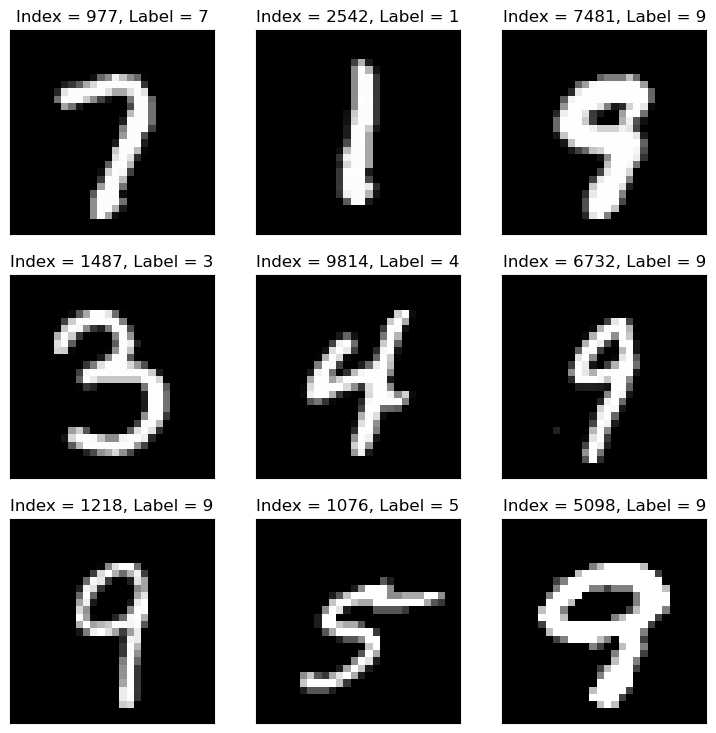

In [45]:
# Plot the Data

hF = PlotMnistImages(mX, vY, numImg)

### Distribution of Labels

When dealing with classification, it is important to know the balance between the labels within the data set.

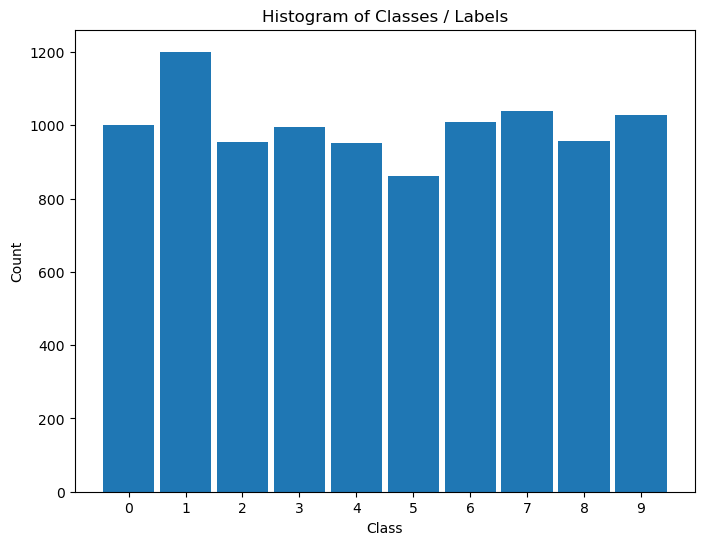

In [46]:
# Distribution of Labels

hA = PlotLabelsHistogram(vY)
plt.show()

* <font color='red'>(**?**)</font> Looking at the _histogram_ of labels, Is the data balanced?

## Train / Test Split

In this section we'll split the data into 2 sub sets: _Train_ and _Test_.

* <font color='red'>(**?**)</font> The split will be random. What could be the issue with that? Think of the balance of labels.  

In [47]:
# Train & Test Split
# SciKit Learn has a built in tool for this split.
# It can take ratios or integer numbers.
# In case only `train_size` or `test_size` is given the other one is the rest of the data.
mXTrain, mXTest, vYTrain, vYTest = train_test_split(mX, vY, train_size = trainRatio, test_size = testRatio, random_state = seedNum)

print(f"for trainRatio = {trainRatio} the testRatio = {testRatio}")
print(f'The train features data shape: {mXTrain.shape}')
print(f'The train labels data shape: {vYTrain.shape}')
print(f'The test features data shape: {mXTest.shape}')
print(f'The test labels data shape: {vYTest.shape}')

for trainRatio = 0.55 the testRatio = 0.44999999999999996
The train features data shape: (5500, 784)
The train labels data shape: (5500,)
The test features data shape: (4500, 784)
The test labels data shape: (4500,)


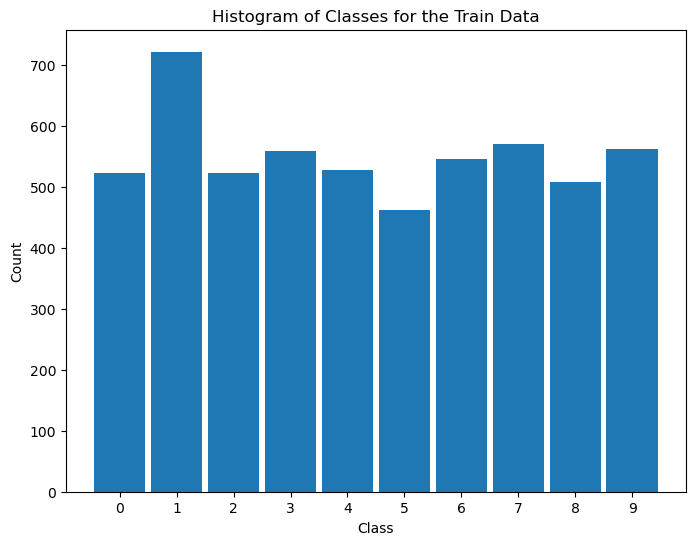

In [48]:
# Distribution of Labels (Train)
# Distribution of classes in train data.

hA = PlotLabelsHistogram(vYTrain)
hA.set_title('Histogram of Classes for the Train Data')
plt.show()

### use stratify:

In [49]:
mXTrain, mXTest, vYTrain, vYTest = train_test_split(mX, vY, train_size = trainRatio, test_size = testRatio, random_state = seedNum,stratify=vY)

print(f"for trainRatio = {trainRatio} the testRatio = {testRatio}")
print(f'The train features data shape: {mXTrain.shape}')
print(f'The train labels data shape: {vYTrain.shape}')
print(f'The test features data shape: {mXTest.shape}')
print(f'The test labels data shape: {vYTest.shape}')

for trainRatio = 0.55 the testRatio = 0.44999999999999996
The train features data shape: (5500, 784)
The train labels data shape: (5500,)
The test features data shape: (4500, 784)
The test labels data shape: (4500,)


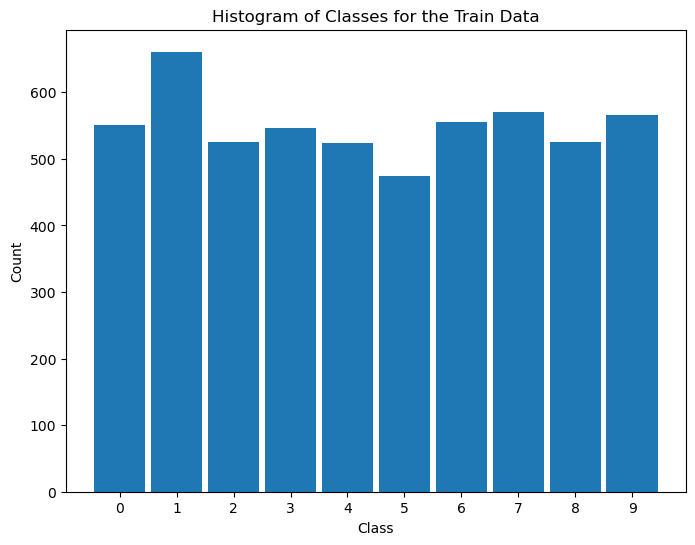

In [50]:
# Distribution of Labels (Train)
# Distribution of classes in train data.

hA = PlotLabelsHistogram(vYTrain)
hA.set_title('Histogram of Classes for the Train Data')
plt.show()

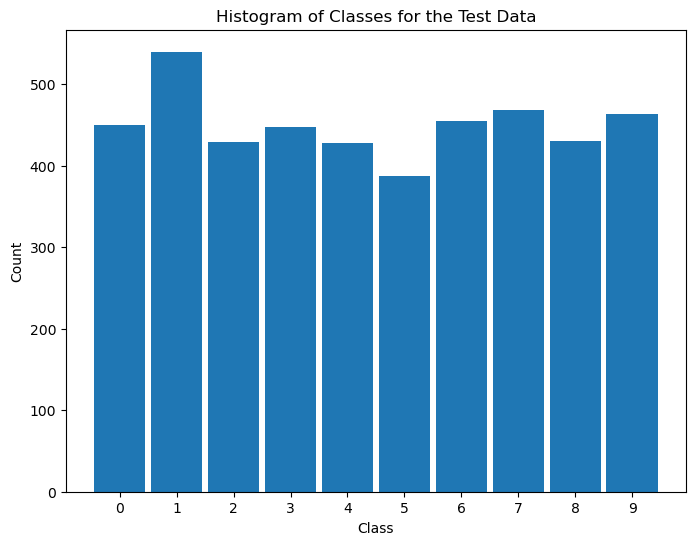

In [51]:
# Distribution of Labels (Test)
# Distribution of classes in test data.

hA = PlotLabelsHistogram(vYTest)
hA.set_title('Histogram of Classes for the Test Data')
plt.show()

* <font color='red'>(**?**)</font> Do you see the same distribution at both sets? What does it mean?
* <font color='blue'>(**!**)</font> Use the `stratify` option in `train_test_split()` and look at the results.

## Train a K-NN Model

In this section we'll train a K-NN model on the train data set and test its performance on the test data set.

In [52]:
# K-NN Model
K = 1
oKnnCls = KNeighborsClassifier(n_neighbors = K)
oKnnCls = oKnnCls.fit(mXTrain, vYTrain)

<font color='red'>(**?**)</font> What would be the score on the _train set_?  
<font color='red'>(**?**)</font> What would be the relation between the performance on the _train set_ vs. _test set_?

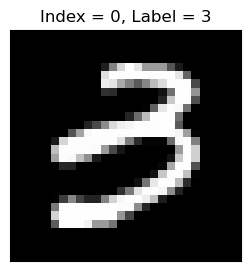

In [53]:
# Prediction on the Train Set

rndIdx  = np.random.randint(mXTrain.shape[0])

## predict in scikit learn need a 2d array !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! => use atleast_2d !!!
yPred = oKnnCls.predict(np.atleast_2d(mXTrain[rndIdx, :])) #<! The input must be 2D data


hF = PlotMnistImages(np.atleast_2d(mXTrain[rndIdx, :]), yPred, 1)

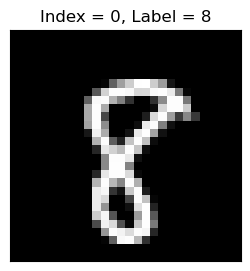

In [54]:
# Prediction on the Test Set

rndIdx  = np.random.randint(mXTest.shape[0])
yPred = oKnnCls.predict(np.atleast_2d(mXTest[rndIdx, :])) #<! The input must be 2D data
hF = PlotMnistImages(np.atleast_2d(mXTest[rndIdx, :]), yPred, 1)

* <font color='blue'>(**!**)</font> Find the sample in the train data set which is closest to the sample above.

### Confusion Matrix and Score on Train and Test Sets

In this section we'll evaluate the performance of the model on the train and test sets.  
The `SciKit Learn` package has some built in functions / classes to display those: `confusion_matrix()`, `ConfusionMatrixDisplay`.

In [55]:
# Predictions
# Computing the prediction per set.
vYTrainPred = oKnnCls.predict(mXTrain) #<! Predict train set
vYTestPred  = oKnnCls.predict(mXTest)  #<! Predict test set

trainAcc = oKnnCls.score(mXTrain, vYTrain)
testAcc  = oKnnCls.score(mXTest, vYTest)

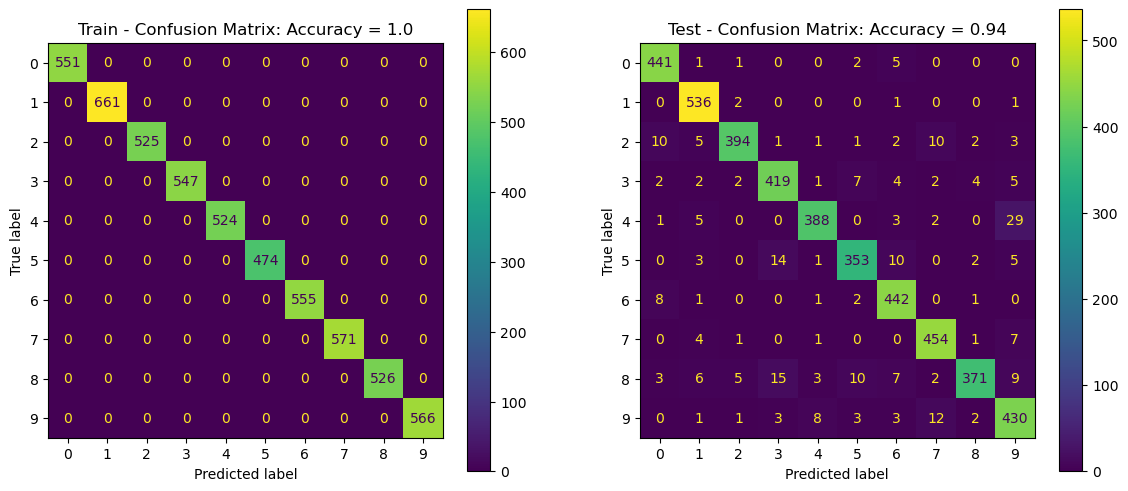

In [56]:
# Plot the Confusion Matrix

hF, hA = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6)) #<! Figure

# Arranging data for the plot function
lConfMatData = [{'vY': vYTrain, 'vYPred': vYTrainPred, 'hA': hA[0], 'dScore': {'Accuracy': trainAcc}, 'titleStr': 'Train - Confusion Matrix'},
{'vY': vYTest, 'vYPred': vYTestPred, 'hA': hA[1], 'dScore': {'Accuracy': testAcc}, 'titleStr': 'Test - Confusion Matrix'}]

for ii in range(2):
    PlotConfusionMatrix(**lConfMatData[ii])

plt.show()

* <font color='red'>(**?**)</font> Look at the most probable error per label, does it make sense?
* <font color='red'>(**?**)</font> What do you expect to happen with a different `K`?
* <font color='blue'>(**!**)</font> Run the above with different values of `K`.
=> plot graph on K till 20...

## Cross Validation

The _Cross Validation_ process allows us to estimate the stability of performance.  
It also the main tool to optimize the model _Hyper Parameters_. 

### Cross Validation as a Measure of Test Performance

Let's see if indeed the cross validation is a better way to estimate the performance of the test set.  
We can do that using _Cross Validation_ on the training set. We'll predict the label of each sample using other data.
We'll use a K-Fold Cross Validation with stratified option to keep the data distribution in tact.

In [57]:
# Cross Validation & Predict
# Prediction the classes using Cross Validation.
numFold = 10

vYTrainPred = cross_val_predict(KNeighborsClassifier(n_neighbors = K), mXTrain, vYTrain, cv = KFold(numFold, shuffle = True))
trainAcc = np.mean(vYTrainPred == vYTrain)


* <font color='blue'>(**!**)</font> Change the values of `numFold`. Try extreme values. What happens?
* <font color='green'>(**@**)</font> Repeat the above with `StratifiedKFold()`.

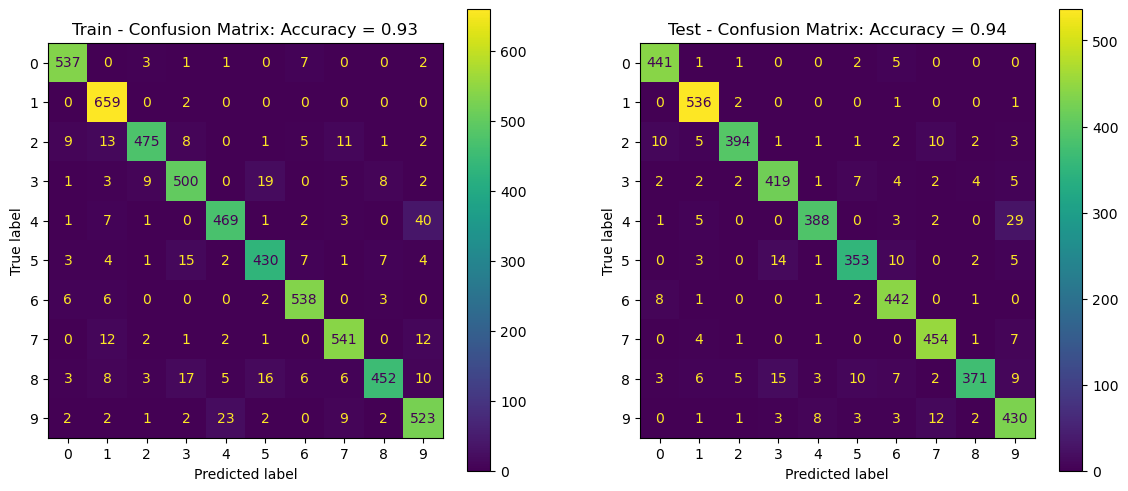

In [58]:
# Plot the Confusion Matrix

hF, hA = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6)) #<! Figure

# Arranging data for the plot function
lConfMatData = [{'vY': vYTrain, 'vYPred': vYTrainPred, 'hA': hA[0], 'dScore': {'Accuracy': trainAcc}, 'titleStr': 'Train - Confusion Matrix'},
{'vY': vYTest, 'vYPred': vYTestPred, 'hA': hA[1], 'dScore': {'Accuracy': testAcc}, 'titleStr': 'Test - Confusion Matrix'}]

for ii in range(2):
    PlotConfusionMatrix(**lConfMatData[ii])

plt.show()


* <font color='blue'>(**!**)</font> Use the `normMethod` parameter to normalize the confusion matrix by rows, columns or all.

### Cross Validation for Hyper Parameter Optimization

We can also use the _Cross Validation_ approach to search for the best _Hype Parameter_.  
The idea is iterating through the data and measure the score we care about.  
The hyper parameter which maximize the score will be used for the production model.

* <font color='brown'>(**#**)</font> Usually, once we set the optimal _hyper parameters_ we'll re train the model on the whole data set.
* <font color='brown'>(**#**)</font> We'll learn how to to automate this process later using built in tools, but the idea is the same.

In [59]:
# Cross Validation for the K parameters
numFold = 10

lK = list(range(1, 13, 2)) #<! Range of values of K
print(f'The range of K: {lK}')
numK = len(lK)

lAcc = [None] * numK

for ii, K in enumerate(lK):
    vYTrainPred = cross_val_predict(KNeighborsClassifier(n_neighbors = K), mX, vY, cv = StratifiedKFold(numFold, shuffle = True))
    lAcc[ii] = np.mean(vYTrainPred == vY)  ## accuracy


The range of K: [1, 3, 5, 7, 9, 11]


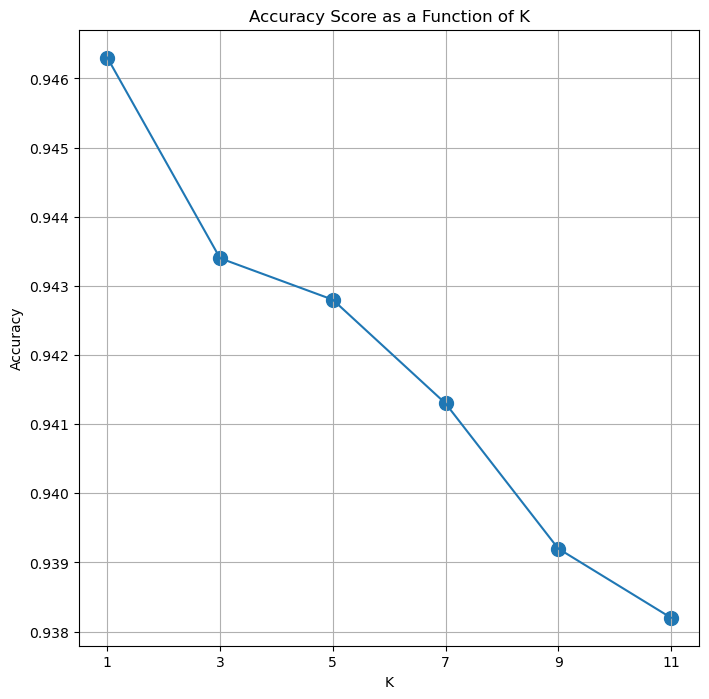

In [60]:
# Plot Results

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA.plot(lK, lAcc)
hA.scatter(lK, lAcc, s = 100)
hA.set_title('Accuracy Score as a Function of K')
hA.set_xlabel('K')
hA.set_ylabel('Accuracy')
hA.set_xticks(lK)
hA.grid()

plt.show()

* <font color='red'>(**?**)</font> What's the optimal `K`?
* <font color='red'>(**?**)</font> What's the _Dynamic Range_ of the results? Think again on the question above.